In [1]:
import sys
import os.path
import statistics
from matplotlib import pyplot as plt

#since we need to import libs from parent dir, need to add parent dir to path
project_path = '/home/idies/workspace/Storage/ncarey/persistent/PULSD/PsychoPy-pylsl-RSVP/'
if project_path not in sys.path:
    sys.path.append(project_path)

from xdf.Python.xdf import load_xdf

In [16]:
xdf_file_path = os.path.join(project_path, 'recordings/RSVPTraining4.xdf')

xdf = load_xdf(xdf_file_path, verbose=False)

#print(xdf[0][0].keys())

#you will need to dbl check this. your xdf may not be indexed the same way
#I think time series is the frame count(or data), time stamps is the actual clock
target_time_series = xdf[0][0]['time_series']
target_time_stamps = xdf[0][0]['time_stamps']

eeg_time_series = xdf[0][1]['time_series']
eeg_time_stamps = xdf[0][1]['time_stamps']

stim_time_series = xdf[0][2]['time_series']
stim_time_stamps = xdf[0][2]['time_stamps']


dict_keys(['info', 'footer', 'time_series', 'time_stamps'])


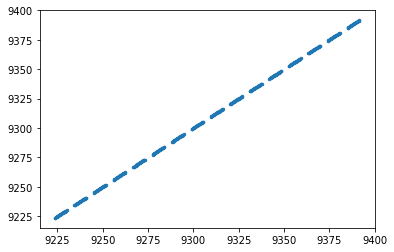

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(stim_time_stamps, stim_time_stamps, marker='o', s=6)

#ax1.set_xlim(0,30)
#ax1.set_ylim(0,30)

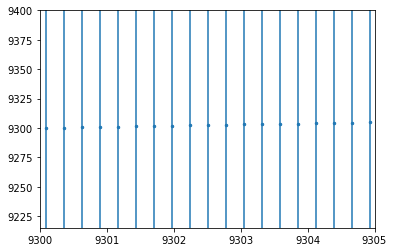

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

#time_stamps_plot = stim_time_stamps# - 4840

ax1.scatter(stim_time_stamps, stim_time_stamps, marker='o', s=6)

ax1.set_xlim(9300,9305)
#ax1.set_ylim(40,42)

for marker in stim_time_stamps:
    ax1.axvline(x = marker)

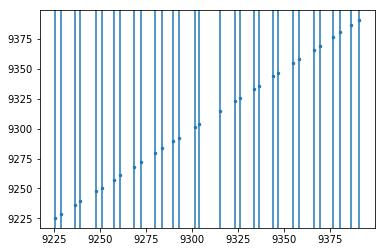

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

#time_stamps_plot = stim_time_stamps# - 4840

ax1.scatter(target_time_stamps, target_time_stamps, marker='o', s=6)

#ax1.set_xlim(9300,9305)
#ax1.set_ylim(40,42)

for marker in target_time_stamps:
    ax1.axvline(x = marker)

In [21]:
len(eeg_time_series)


93728

(9301, 9302)

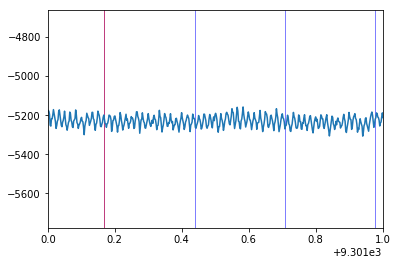

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

channel_a = [reading[14] for reading in eeg_time_series]

for marker in stim_time_stamps:
    ax1.axvline(x = marker, color='b', linewidth=.5)
for marker in target_time_stamps:
    ax1.axvline(x = marker, color='r', linewidth=.5)

ax1.plot(eeg_time_stamps, channel_a)


ax1.set_xlim(9301,9302)
#ax1.set_ylim(-5310,-5200)

In [33]:
#epoch the data

class EpochData:
    
    def calculateAverageChannel(self):
        avg_channel = []
        for time_index in range(len(self.zeroed_eeg_channels[0])):
            avg_reading = 0
            for channel_index in range(len(self.zeroed_eeg_channels)):
                avg_reading = avg_reading + self.zeroed_eeg_channels[channel_index][time_index]
            avg_reading = avg_reading / len(self.zeroed_eeg_channels)
            avg_channel.append(avg_reading)
        
        self.avg_channel = avg_channel
    #take absolute value of voltages, subtract median from each
    def zeroVoltages(self):
        self.zeroed_eeg_channels = []
        for channel_index in range(len(self.eeg_voltages[0])):
            cur_channel = [reading[channel_index] for reading in self.eeg_voltages]
            channel_median = statistics.median(cur_channel)
            self.zeroed_eeg_channels.append(cur_channel - channel_median)
    
    def addEEGTimeValue(self, eeg_time, eeg_channel_values):
        self.eeg_time_stamps.append(eeg_time)
        self.eeg_voltages.append(eeg_channel_values)
    
    def __init__(self, stim_time_stamp):
        self.stim_time_stamp = stim_time_stamp
        self.eeg_time_stamps = []
        self.eeg_voltages = []
        self.zeroed_eeg_channels = []
        self.avg_channel = []

target_epochs = []
stim_epochs = []
epoch_length = .6

for target_time in target_time_stamps:
    cur_epoch = EpochData(target_time)
    for index in range(len(eeg_time_stamps)):
        if target_time < eeg_time_stamps[index]:
            continue
        elif target_time < eeg_time_stamps[index] + epoch_length:
            cur_epoch.addEEGTimeValue(eeg_time_stamps[index], eeg_time_series[index])
        else:
            continue
    cur_epoch.zeroVoltages()
    cur_epoch.calculateAverageChannel()
    target_epochs.append(cur_epoch)
 

for stim_time in stim_time_stamps:
    cur_epoch = EpochData(stim_time)
    for index in range(len(eeg_time_stamps)):
        if stim_time < eeg_time_stamps[index]:
            continue
        elif stim_time < eeg_time_stamps[index] + epoch_length:
            cur_epoch.addEEGTimeValue(eeg_time_stamps[index], eeg_time_series[index])
        else:
            continue
    cur_epoch.zeroVoltages()
    cur_epoch.calculateAverageChannel()
    stim_epochs.append(cur_epoch)
 

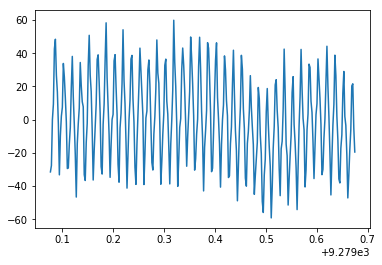

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

epoch_index = 10
channel_index = 1

#ax1.plot(epochs[epoch_index].eeg_time_stamps, [reading[channel_index] for reading in epochs[epoch_index].eeg_voltages])
ax1.plot(target_epochs[epoch_index].eeg_time_stamps, target_epochs[epoch_index].zeroed_eeg_channels[channel_index])
#ax1.plot(epochs[epoch_index].eeg_time_stamps, epochs[epoch_index].avg_channel)
#ax1.axvline(x = .1 + epochs[epoch_index].eeg_time_stamps[0], color='r', linewidth=.5)
#ax1.axvline(x = .075 + epochs[epoch_index].eeg_time_stamps[0], color='r', linewidth=.5)
#epochs[0].eeg_time_stamps

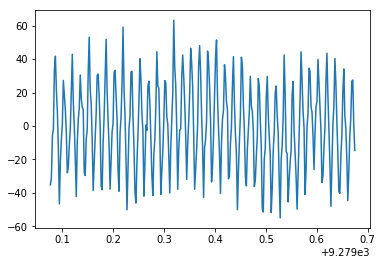

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(target_epochs[epoch_index].eeg_time_stamps, target_epochs[epoch_index].avg_channel)
#ax1.axvline(x = .1 + epochs[epoch_index].eeg_time_stamps[0], color='r', linewidth=.5)
#ax1.axvline(x = .075 + epochs[epoch_index].eeg_time_stamps[0], color='r', linewidth=.5)

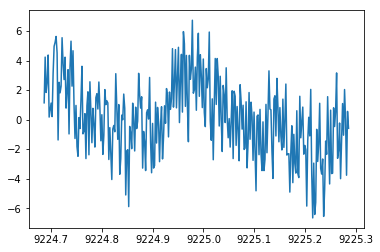

In [37]:
#average_epoch

fig = plt.figure()
ax1 = fig.add_subplot(111)

average_epoch = []
for reading_index in range(len(target_epochs[0].avg_channel)):
    avg_reading = 0
    for epoch_index in range(len(target_epochs)):
        avg_reading = avg_reading + target_epochs[epoch_index].avg_channel[reading_index]
    avg_reading = avg_reading / len(target_epochs)
    average_epoch.append(avg_reading)

ax1.plot(target_epochs[0].eeg_time_stamps, average_epoch)
#ax1.axvline(x = .1 + epochs[0].eeg_time_stamps[0], color='r', linewidth=.5)
#ax1.axvline(x = .075 + epochs[0].eeg_time_stamps[0], color='r', linewidth=.5)
#ax1.set_ylim(-10, 10)